In [1]:
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf
import pandas as pd
import scipy.stats as stats

In [2]:
# Activation functions:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0.01*x, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Derivatives:

def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

Text(0, 0.5, 'density')

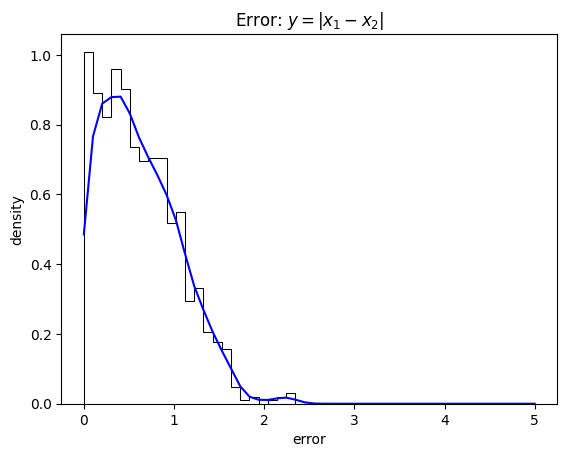

In [4]:
# Definition of error distribution:
x1 = np.random.normal(0,0.5,1000)
x2 = np.random.uniform(0,1,1000)
y  = np.abs(x1 - x2)

density = stats.gaussian_kde(y)
n, x, _ = plt.hist(y, bins=np.linspace(0,5,50),
                     histtype=u'step', density=True,linewidth=0.75,color='black')  
plt.plot(x, density(x),color='blue')
plt.title(r'Error: $y = |x_1 - x_2|$')
plt.xlabel('error')
plt.ylabel('density')

In [ ]:
# Neural Networks with one hidden layer:

Text(0.5, 1.0, 'Cost function for Stochastic Gradient Descent method')

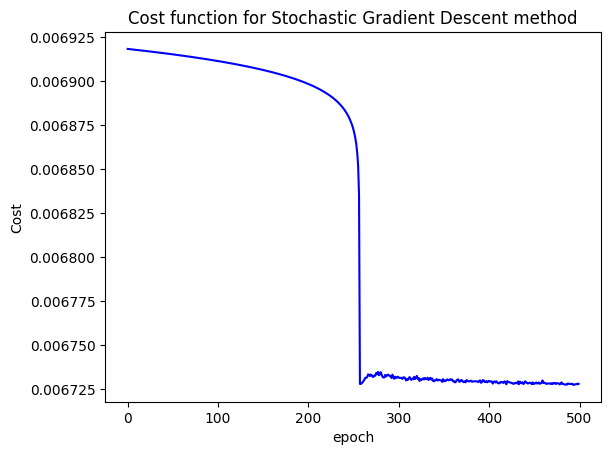

In [5]:
# Stochastic Gradient Descent network:

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

# Generate random values for the parameters
g = np.random.uniform(-1, 1, size=N)
x_c = np.random.uniform(0.1, 0.5, size=N)

# Calculate u'(0) based on the given parameters
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c
# Split the data:x
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Set activation function:
f = [tanh , sigmoid]
f_derivative = [tanh_derivative , sigmoid_derivative]

# Initialize weights and biases
input_size = 1
hidden_size = 80
output_size = 1

np.random.seed(9)
w_1 = 0.5 - np.random.randn(hidden_size,input_size)
b_1 = np.zeros([hidden_size,1])
w_2 = 0.5 - np.random.randn(output_size,hidden_size)
b_2 = np.zeros([output_size])

# Learning rate
a = 0.01
# Number of epochs2
epochs = 400
# Cost function
J = np.zeros(epochs)

for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for k in range(N_train):
        j = ransel[k]

        # Forward propagation
        z_1 = np.dot(X_train[j] , w_1) + b_1
        a_1 = f[0](z_1)
        z_2 = np.dot(w_2 , a_1) + b_2
        z_2 = z_2[0,0]
        o   = f[1](z_2)
    

        # Backpropagation
        delta_2 = (o - y_train[j]) * f_derivative[1](z_2)
        grad_w_2 = np.dot(a_1.T , delta_2)
        grad_b_2 = delta_2
        w_2 = w_2 - a * grad_w_2
        b_2 = b_2 - a * grad_b_2

        delta_1 = f_derivative[0](z_1) * np.dot(delta_2 , w_2.T)
        grad_w_1 = np.dot(X_train[j], delta_1)
        grad_b_1 = delta_1
        w_1 = w_1 - a * grad_w_1
        b_1 = b_1 - a * grad_b_1

    for j in range(N_train):
        z_1 = np.dot(X_train[j], w_1) + b_1
        a_1 = f[0](z_1)
        z_2 = np.dot(a_1, w_2) + b_2
        z_2 = z_2[0,0] 
        o   = f[1](z_2)
        denom = 1 / (2 * N_train)
        J[ep] += denom * (((y_train[j] - o) ** 2).sum())

# Test data:
y_pred = np.zeros([N_test])
for k in range(N_test):
    # Forward propagation
    z_1 = np.dot(X_test[k], w_1) + b_1
    a_1 = f[0](z_1)
    z_2 = np.dot(a_1, w_2) + b_2
    z_2 = z_2[0,0]
    y_pred[k] = f[1](z_2)

import matplotlib.pyplot as plt

plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function for Stochastic Gradient Descent method")

Final RMSE: 0.1194


Text(0, 0.5, 'density')

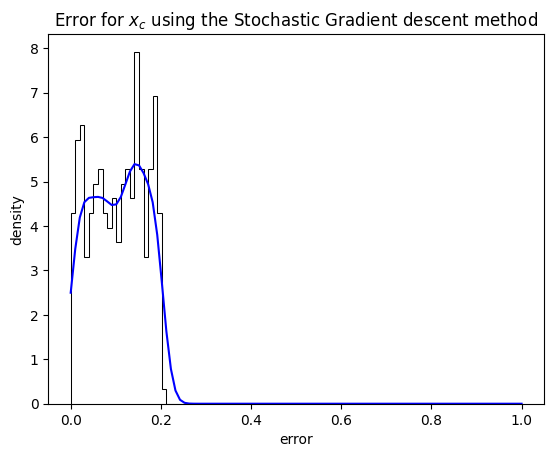

In [6]:
# Calculate RMSE on test set
import scipy.stats as stats

dif_s = np.abs(y_pred - y_test)

density = stats.gaussian_kde(dif_s)
n, x, _ = plt.hist(dif_s, bins=np.linspace(0,1 , 100),
                     histtype=u'step', density=True,linewidth=0.75,color='black')  
plt.plot(x, density(x),color='blue')
plt.title('Error for $x_{c}$ using the Stochastic Gradient descent method')
plt.xlabel('error')
plt.ylabel('density')

In [94]:
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = 0.3
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 300

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,32,32,32]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output
    
# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.30404143362863384, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.12723059117990737, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.3718748624965696, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.41035662860049094, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.40014236231175243, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.21387056907380017, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.34619125474459395, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.3798721913378082, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.3498128740300703, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.3652004246804005, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.19307795001631847, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.0821085277864717

Text(0.5, 1.0, 'Cost function: $MSE = \\frac{1}{N_{train}}\\left[ \\sum_{i=1}^{N_{train}}\\left(y_{pred} - y_{train}\\right)^2 \\right]$')

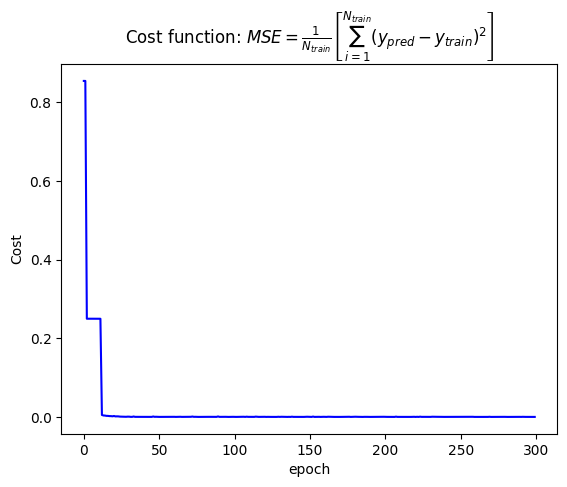

In [58]:
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{N_{train}}\left[ \sum_{i=1}^{N_{train}}\left(y_{pred} - y_{train}\right)^2 \right]$")

Text(0, 0.5, 'density')

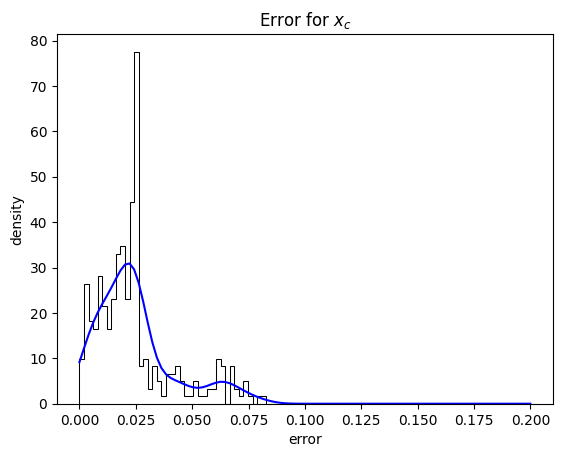

In [95]:
import scipy.stats as stats
dif = np.abs(y_pred - y_test)

density = stats.gaussian_kde(dif)
n, x, _ = plt.hist(dif, bins=np.linspace(0,0.2,100),
                     histtype=u'step', density=True,linewidth=0.75,color='black')  
plt.plot(x, density(x),color='blue')
plt.title('Error for $x_{c}$')
plt.xlabel('error')
plt.ylabel('density')

In [97]:
print(format(np.min(dif),".5f"))
print(format(np.max(dif),'.5f'))
print(format(np.mean(dif),'.5f'))
print(format(np.var(dif),'.5f'))

0.00004
0.08097
0.02449
0.00031


In [71]:
# Justify the Epochs:

# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = 0.3
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 100

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,32,32,32]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output
    
# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")
y_1 = y_pred

Test sample 1: Predicted value = 0.28764033928280414, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.10823884907942885, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.35544058618606594, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.39400156363853706, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.38375902469082623, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.19760261951703764, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.3297444043453299, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.36344831792712856, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.33336590018568807, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.3487598466608094, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.1761368816596632, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.061794767660046

In [76]:
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = 0.3
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 200

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,32,32,32]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output
    
# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")
y_2 = y_pred

Test sample 1: Predicted value = 0.28256876210951315, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.10351481699650546, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.35124673235642584, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.3903117583651614, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.3799352302460534, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.1918287726972995, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.3252160332298289, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.3593590051569948, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.3288845666792194, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.34447886714008047, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.1706042156334478, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.05765732176467928, 

In [77]:
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = 0.3
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 300

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,32,32,32]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output
    
# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")
y_3 = y_pred

Test sample 1: Predicted value = 0.30404143362863384, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.12723059117990737, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.3718748624965696, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.41035662860049094, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.40014236231175243, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.21387056907380017, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.34619125474459395, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.3798721913378082, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.3498128740300703, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.3652004246804005, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.19307795001631847, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.0821085277864717

In [78]:
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = 0.3
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 400

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,32,32,32]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output
    
# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")
y_4 = y_pred

Test sample 1: Predicted value = 0.33047220514773124, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.14818789152108394, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.40941361701196566, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.4535709917012166, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.4419046552469899, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.2230622942968301, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.3796742208336027, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.41863248758716126, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.38387953005613823, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.4017042992880078, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.2044290973953736, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.10970247288056116,

NameError: name 'y_4' is not defined

In [81]:
y_4 = y_pred

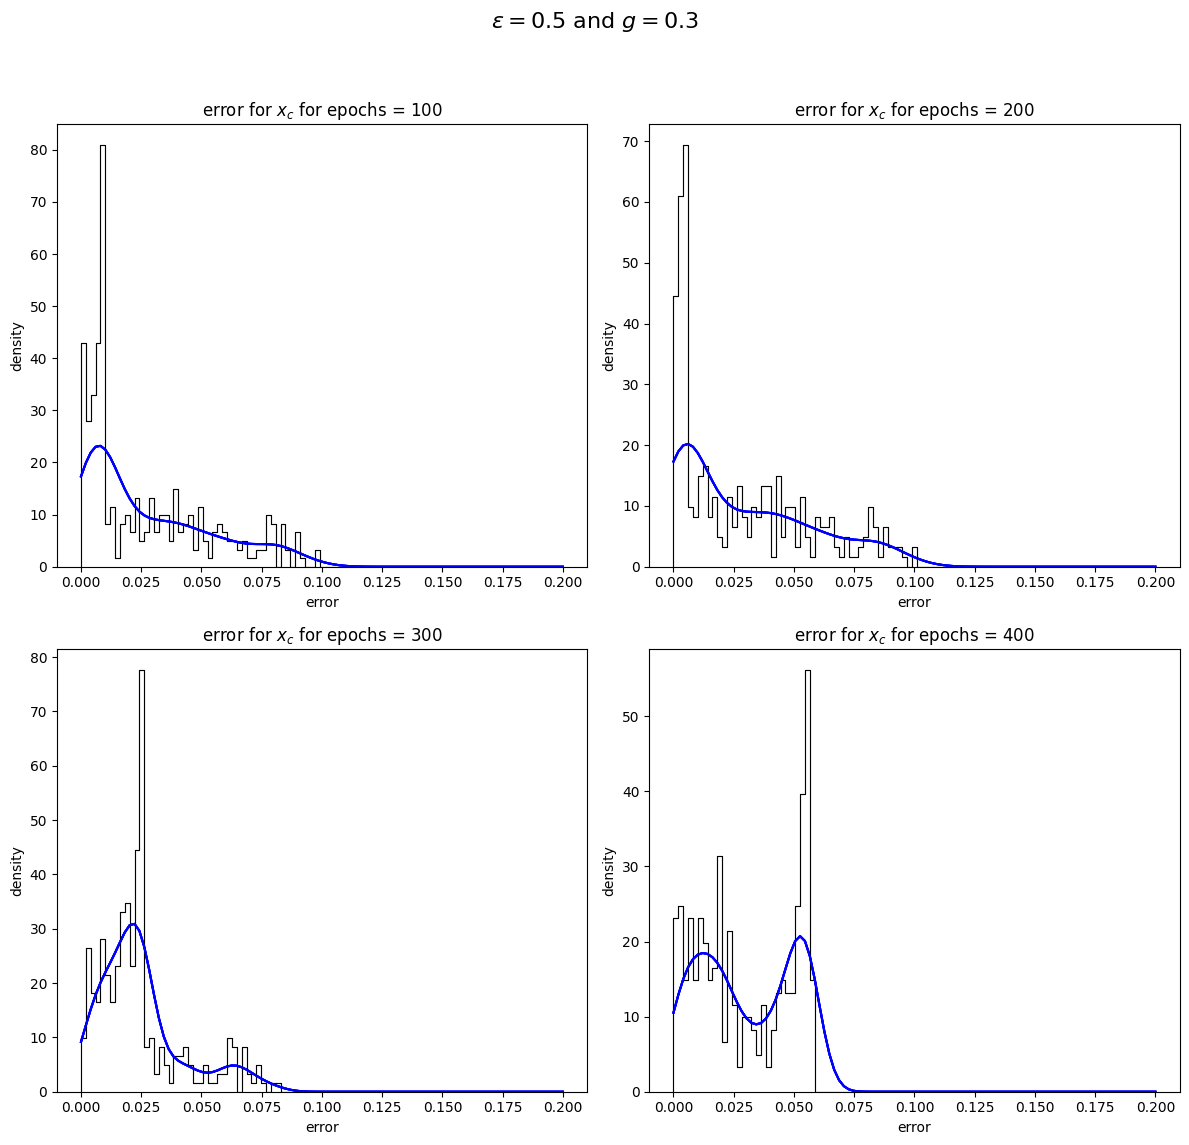

In [105]:
# Plot of error for x_c and y_c;
diff_1 = np.abs(y_1 - y_test)
diff_2 = np.abs(y_2 - y_test)
diff_3 = np.abs(y_3 - y_test)
diff_4 = np.abs(y_4 - y_test)

import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,12))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1)
    n, x, _ = axes[0,0].hist(diff_1, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c}$ for epochs = 100')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2)
    n, x, _ = axes[0,1].hist(diff_2, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $x_{c}$ for epochs = 200')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3)
    n, x, _ = axes[1,0].hist(diff_3, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c}$ for epochs = 300')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    
    density = stats.gaussian_kde(diff_4)
    n, x, _ = axes[1,1].hist(diff_4, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c}$ for epochs = 400')
    axes[1,1].set_xlabel('error')
    axes[1,1].set_ylabel('density')
    
# Set a general title for the entire figure
    
# Adjust the layout and spacing between subplots
fig.suptitle(r'$\varepsilon = 0.5$ and $g = 0.3$',fontsize=16)
# Adjust the layout and spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect parameter as needed
plt.show()

In [92]:
print(format(np.max(diff_1),".5f"))
print(format(np.max(diff_2),".5f"))
print(format(np.max(diff_3),".5f"))
print(format(np.max(diff_4),".5f"))

0.09730
0.10088
0.08097
0.05674


Test sample 1: Predicted value = 0.3213337845933492, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.17894678008928275, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.300662923328305, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.4236411920031476, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.31799461884042224, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.3230777996279377, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.3273045345222801, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.3233613293581048, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.32303689643980416, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.32239453758874764, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.32315874340833706, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.32318185357924045, 

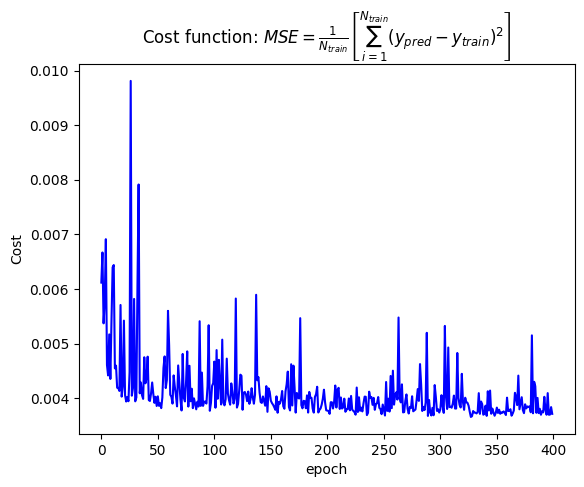

In [99]:
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = np.random.uniform(-1,1,size = N)
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 400

# Activation function choices:
function = [sigmoid, leaky_relu, leaky_relu, sigmoid, leaky_relu, leaky_relu, tanh]
drv_function = [sigmoid_derivative, leaky_relu_derivative, leaky_relu_derivative, sigmoid_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,100,32,100]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{N_{train}}\left[ \sum_{i=1}^{N_{train}}\left(y_{pred} - y_{train}\right)^2 \right]$")

# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Text(0, 0.5, 'density')

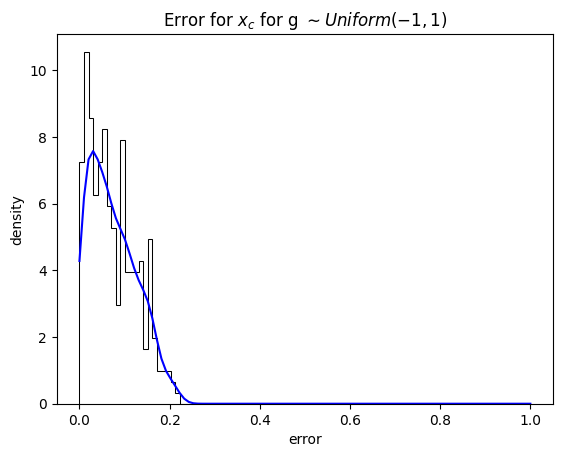

In [100]:
import scipy.stats as stats
dif = np.abs(y_pred - y_test)

density = stats.gaussian_kde(dif)
n, x, _ = plt.hist(dif, bins=np.linspace(0,1 , 100),
                     histtype=u'step', density=True,linewidth=0.75,color='black')  
plt.plot(x, density(x),color='blue')
plt.title('Error for $x_{c}$ for g $\sim Uniform(-1,1)$')
plt.xlabel('error')
plt.ylabel('density')

In [106]:
print(format(np.min(dif),".5f"))
print(format(np.max(dif),'.5f'))
print(format(np.mean(dif),'.5f'))
print(format(np.var(dif),'.5f'))

0.00047
0.21593
0.07354
0.00272


In [129]:
# 2 Dimension Neural Network:
## import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.5

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = np.random.uniform(-1, 1, size = N)

p1 = g - 2 * np.sqrt(epsilon) * A * (1 - np.exp(- x_c / np.sqrt(epsilon))) 
p2 = g - A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)))
p = g - (A / 2) * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = np.column_stack((p,g))  # Two input features (p, g)
y = x_c

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TensorFlow implementation
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(280, activation='relu', input_shape=(2,)),  # Two input features (p, g)
    tf.keras.layers.Dense(165, activation='relu'),
    tf.keras.layers.Dense(134, activation='relu'),
    tf.keras.layers.Dense(134, activation='relu'),
    tf.keras.layers.Dense(153, activation='relu'),
    tf.keras.layers.Dense(1,  activation='tanh')    # Output layer
])

model.compile(optimizer=SGD(0.01), loss='mse')

# Train the TensorFlow model
history = model.fit(X_train, y_train, epochs= 100, batch_size=1)

# Use the trained model for prediction on the test set
y_pred_2 = model.predict(X_test)

# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred[i][0]}, True value = {y_test[i]}")

# Access the loss values from the history object
loss_values = history.history['loss']

Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0095
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0078
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0068
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0039
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0028
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0024
Epoch 11/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0021
Epoch 12/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 13/100


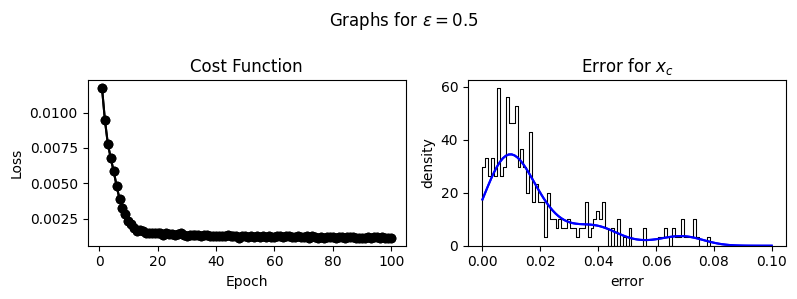

In [130]:
diff_2 = np.abs(y_pred_2.reshape(-1) - y_test)
diff_2 = pd.DataFrame(diff_2)

fig, axes = plt.subplots(nrows=1, ncols=2,figsize = (8,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1.iloc[:,0])
    n, x, _ = axes[1].hist(diff_1.iloc[:,0], bins=np.linspace(0,0.1 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('Error for $x_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')

    # Plot the cost function
    axes[0].plot(range(1, len(loss_values) + 1), loss_values, color = 'black',marker = 'o')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Cost Function')

# Set a general title for the entire figure
fig.suptitle(r'Graphs for $\varepsilon = 0.5$')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [132]:
print(format(np.min(diff_2.iloc[:,0]),".5f"))
print(format(np.max(diff_2.iloc[:,0]),'.5f'))
print(format(np.mean(diff_2.iloc[:,0]),'.5f'))
print(format(np.var(diff_2.iloc[:,0]),'.5f'))

0.00012
0.08954
0.02399
0.00050


In [ ]:
# Function analysis:

Text(0, 0.5, 'p')

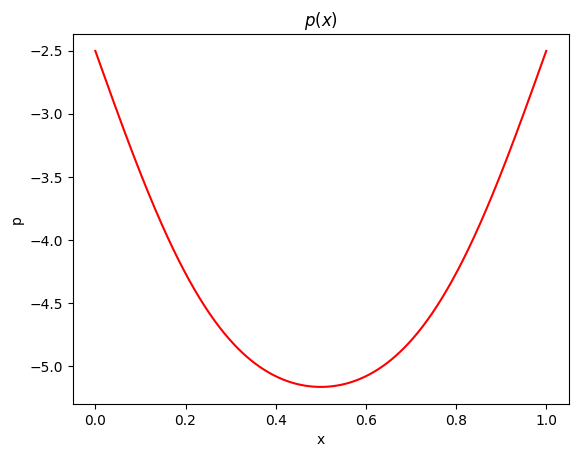

In [159]:
from scipy.special import erfinv
import numpy as np

np.random.seed(42)

# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.09

x_c = np.random.uniform(0, 1, size=N)

def P1(x):
    t = 0.3
    R1 = t - (A / 2) * np.sqrt(np.pi * epsilon) * (erf(x / np.sqrt(epsilon)) + erf((1 - x) / np.sqrt(epsilon)))
    return R1

x = np.linspace(0, 1, N)

y1 = P1(x)

plt.plot(x, y1, 'r')
plt.title(r'$p(x)$') ; plt.xlabel(r'x'); plt.ylabel('p')

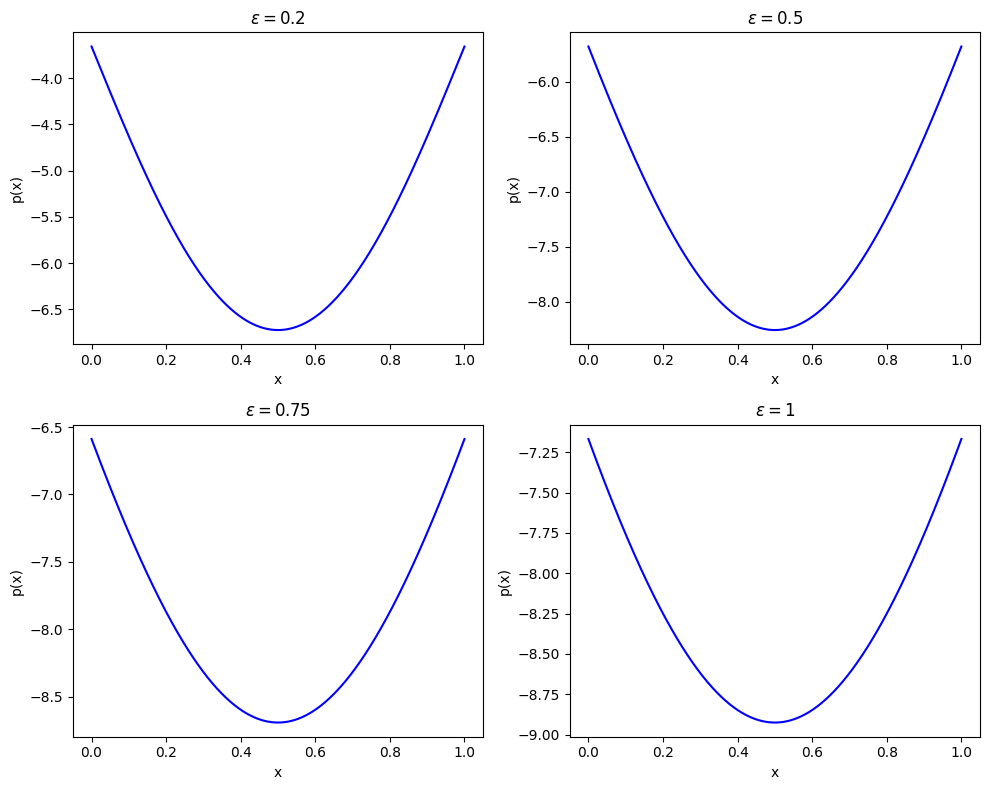

In [165]:
from scipy.special import erfinv
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilons1 = [0.001, 0.01, 0.05, 0.09999]
epsilons = [0.2, 0.5, 0.75, 1]
x_c = np.random.uniform(0, 1, size=N)

def P1(x, epsilon):
    t = 0.3
    R1 = t - (A / 2) * np.sqrt(np.pi * epsilon) * (erf(x / np.sqrt(epsilon)) + erf((1 - x) / np.sqrt(epsilon)))
    return R1

x = np.linspace(0, 1, N)

# Plotting the figures
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, ax in enumerate(axes.flatten()):
    epsilon = epsilons[i]
    y1 = P1(x, epsilon)
    ax.plot(x, y1, 'blue')
    ax.set_title(fr'$\epsilon = {epsilon}$')
    ax.set_xlabel(r'x')
    ax.set_ylabel(r'p(x)')

plt.tight_layout()
plt.show()

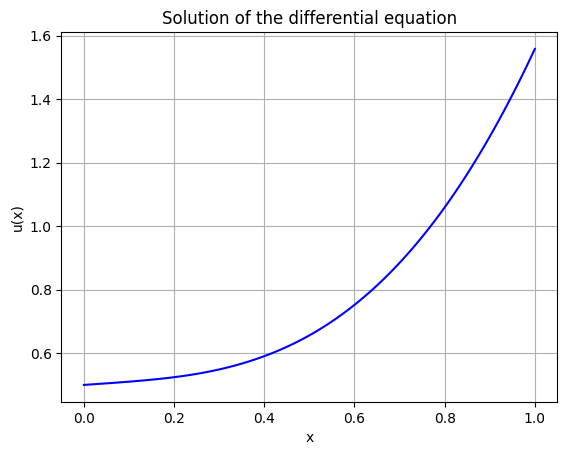

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
A = 10
epsilon = 0.2
u_L = 0.5 # Initial condition u(0)
g = 0.2   # Neumann boundary condition u'(1)
p = 0.1   # Dirichlet boundary condition u'(0)

# Define the domain
x_start = 0.0
x_end = 1.0
N = 100  # Number of grid points
dx = (x_end - x_start) / N

# Initialize the variables
x = np.linspace(x_start, x_end, N)
u = np.zeros(N)
v = np.zeros(N)
w = np.zeros(N)

# Set the initial conditions
u[0] = u_L
v[0] = p

# Solve the differential equation using the finite difference method
for i in range(1, N):
    # Compute f(x)
    f = A * np.exp(-((x[i] - x_c) ** 2) / epsilon)
    
    # Compute the derivatives
    v[i] = v[i-1] + dx * w[i-1]
    w[i] = w[i-1] + dx * f[i]
    
    # Update the solution u(x)
    u[i] = u[i-1] + dx * v[i-1]

# Apply the Neumann boundary condition
v[-1] = g

# Plot the solution
plt.plot(x, u,color = 'blue')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution of the differential equation')
plt.grid(True)
plt.show()

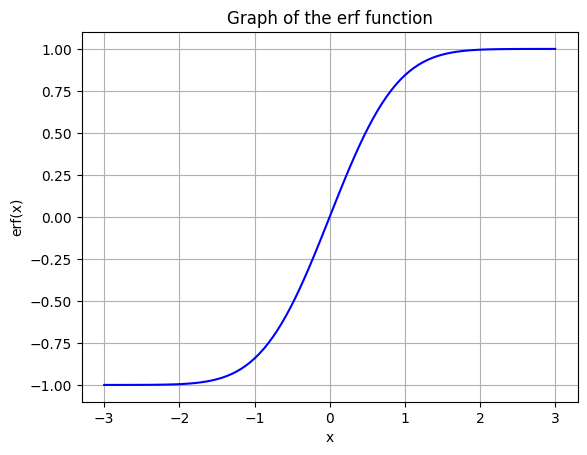

In [168]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
y = erf(x)

plt.plot(x, y, color = 'blue')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Graph of the erf function')
plt.grid(True)
plt.show()

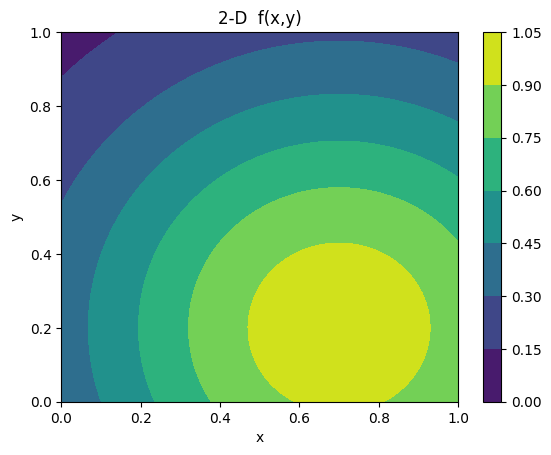

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def f_3d(x, y, x_c, y_c, epsilon, A):
    return A * np.exp(-((x - x_c)**2 / epsilon)) * np.exp(-((y - y_c)**2 / epsilon))

# Define the parameters
A = 1.0
x_c = 0.7
y_c = 0.2
epsilon = 0.5

# Generate x and y coordinates for the grid
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute the values of the function f(x, y)
Z = f_3d(X, Y, x_c, y_c, epsilon, A)

# Plot the 2D Gaussian distribution
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('2-D  f(x,y)')
plt.show()


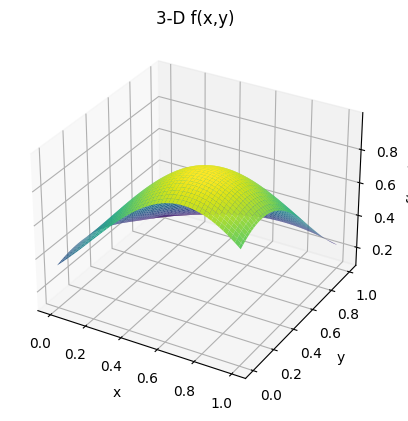

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f_3d(x, y, x_c, y_c, epsilon, A):
    return A * np.exp(-((x - x_c)**2 / epsilon)) * np.exp(-((y - y_c)**2 / epsilon))

# Define the parameters
A1 = 1.0
x_c = 0.7
y_c = 0.2
epsilon = 0.5

# Generate x and y coordinates for the grid
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Compute the values of the function f(x, y)
Z = f_3d(X, Y, x_c, y_c, epsilon, A)

# Plot the 3D Gaussian distribution
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3-D f(x,y)')
plt.show()

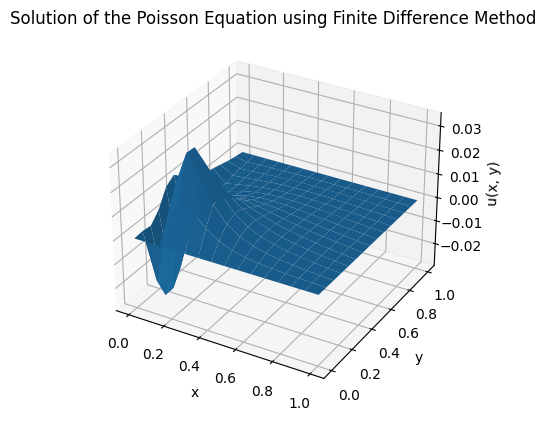

In [19]:
# 2-d Differential equation:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 15  # Number of grid points in x-direction
M = 15  # Number of grid points in y-direction
H = 1.0  # Width of the domain in x-direction
L = 1.0  # Height of the domain in y-direction
dx = H / (N - 1)  # Grid spacing in x-direction
dy = L / (M - 1)  # Grid spacing in y-direction
h = dx  # Common grid spacing

# Define the function f(x, y)
def f(x, y, x_c, y_c, epsilon, A):
    return A * np.exp(-(x - x_c)**2 / epsilon) * np.exp(-(y - y_c)**2 / epsilon)

# Initialize matrices and vectors
G = np.zeros((N * M, N * M))  # Coefficient matrix
b = np.zeros(M * N)  # Right-hand side vector
u = np.zeros(M * N)  # Solution vector

# Populate matrices and vectors
for j in range(1, N - 1):
    for i in range(1, M - 1):
        I = j * M + i  # Global row index

        # Fill coefficient matrix G using finite difference scheme
        G[I, I] = 4
        G[I, I - 1] = -1
        G[I, I + 1] = -1
        G[I, (j + 1) * M + i] = -1
        G[I, (j - 1) * M + i] = -1

        # Compute the coordinates (x, y) for the current grid point
        x = (i - 1) * h
        y = (j - 1) * h

        # Evaluate the function f at (x, y) and assign the value to the corresponding entry in b
        b[I] = h**2 * f(x, y, 0.1, 0.1, 0.01, 10)

# Apply boundary conditions

# Enforce u = 0 on y = 0 and y = Ly
for j in range(N):
    I = j * M + 1  # Global index

    # Set the corresponding row of G and element of b to enforce u = 0
    G[I, I] = 1
    b[I] = 0

for j in range(N):
    I = j * M + M - 1  # Global index

    # Set the corresponding row of G and element of b to enforce u = 0
    G[I, I] = 1
    b[I] = 0

# Enforce u = 0 on x = 0 and x = Lx
for i in range(M):
    I = i  # Global index

    # Set the corresponding row of G and element of b to enforce u = 0
    G[I, I] = 1
    b[I] = 0

for i in range(M):
    I = (N - 1) * M + i  # Global index

    # Set the corresponding row of G and element of b to enforce u = 0
    G[I, I] = 1
    b[I] = 0

# Solve the linear system G * u = b
u = np.linalg.lstsq(G, b, rcond=None)[0]

# Reshape the solution vector into a grid
u_grid = u.reshape((N, M))

# Plot the solution
X, Y = np.meshgrid(np.linspace(0, 1, N), np.linspace(0, 1, M))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u_grid)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
ax.set_title('Solution of the Poisson Equation using Finite Difference Method')

# Show the plot
plt.show()

In [3]:
# 2-D:
import pandas as pd
df = pd.read_csv('C:/Users/basil/Downloads/data_01.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

In [4]:
# Build neural network:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred = model.predict(X_test)

# Print all predictions alongside the actual values
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("Predicted:", predictions[i])
    print("Actual:", y_test.iloc[i])
    print()


Epoch 1/100
700/700 [==============================] - 2s 1ms/step - loss: 0.0114
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0063
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0048
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0031
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0026
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0021
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0018
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 11/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 12/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0015
Epoch 13/100


700/700 [==============================] - 1s 1ms/step - loss: 2.4152e-04
Epoch 97/100
700/700 [==============================] - 1s 1ms/step - loss: 3.5747e-04
Epoch 98/100
700/700 [==============================] - 1s 1ms/step - loss: 3.6188e-04
Epoch 99/100
700/700 [==============================] - 1s 1ms/step - loss: 2.4996e-04
Epoch 100/100
10/10 [==============================] - 0s 1ms/step
[[0.48137227 0.03612922]
 [0.27645928 0.1445815 ]
 [0.22037487 0.04150705]
 [0.48661563 0.49146417]
 [0.3519811  0.2836058 ]]
10/10 [==============================] - 0s 1ms/step
Sample 1:
Predicted: [0.48137227 0.03612922]
Actual: x_c    0.473840
y_c    0.038028
Name: 902, dtype: float64

Sample 2:
Predicted: [0.27645928 0.1445815 ]
Actual: x_c    0.29688
y_c    0.13141
Name: 124, dtype: float64

Sample 3:
Predicted: [0.22037487 0.04150705]
Actual: x_c    0.262960
y_c    0.013981
Name: 150, dtype: float64

Sample 4:
Predicted: [0.48661563 0.49146417]
Actual: x_c    0.49308
y_c    0.49018
Na

Test sample 1: Predicted value = 0.48917878563650624, True value = 0.47384
Test sample 2: Predicted value = 0.2836066828254502, True value = 0.29688
Test sample 3: Predicted value = 0.19845717642360652, True value = 0.26296
Test sample 4: Predicted value = 0.5032613674272006, True value = 0.49308
Test sample 5: Predicted value = 0.3667477288027329, True value = 0.36684
Test sample 6: Predicted value = 0.0940773292681358, True value = 0.08638
Test sample 7: Predicted value = 0.29349381257024587, True value = 0.29425
Test sample 8: Predicted value = 0.4170655605426474, True value = 0.41876
Test sample 9: Predicted value = 0.3394386253048094, True value = 0.33861
Test sample 10: Predicted value = 0.29655069940949885, True value = 0.29865
Test sample 11: Predicted value = 0.33936048753576115, True value = 0.34979
Test sample 12: Predicted value = 0.454931835079168, True value = 0.45053
Test sample 13: Predicted value = 0.2922067798163412, True value = 0.28624
Test sample 14: Predicted valu

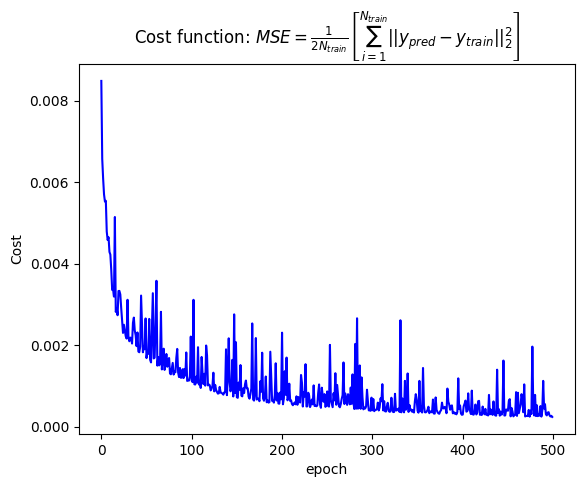

In [5]:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

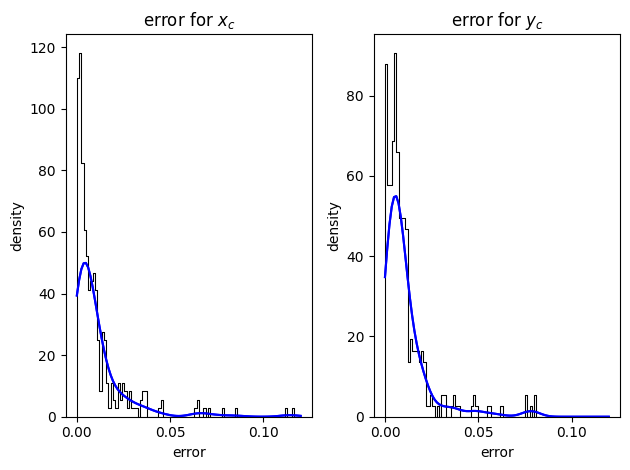

The mean for error for xc is 0.010748865218108517
The mean for error for yc is 0.010801923529260293
The variance for error for xc is 0.00024327950081645732
The variance for error for yc is 0.00017569597132636278


In [6]:
# Error:
error_xc = np.zeros(N_test)
for i in range(N_test):
    error_xc[i] = abs(y_test.iloc[i,0] - y_pred.iloc[i,0])

error_yc = np.zeros(N_test)
for i in range(N_test):
    error_yc[i] = abs(y_test.iloc[i,1] - y_pred.iloc[i,1])
    
# Plot of error for x_c and y_c;
import scipy.stats as stats


fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(error_xc)
    n, x, _ = axes[0].hist(error_xc, bins=np.linspace(0,0.12 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_c$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(error_yc)
    n, x, _ = axes[1].hist(error_yc, bins=np.linspace(0,0.12 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_c$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')

plt.tight_layout()
plt.show()

# The mean of the error
print('The mean for error for xc is',error_xc.mean())
print('The mean for error for yc is',error_yc.mean())

# The variance
print('The variance for error for xc is', error_xc.var())
print('The variance for error for yc is', error_yc.var())

Test sample 1: Predicted value = 0.47576539412745433, True value = 0.47384
Test sample 2: Predicted value = 0.29546065243666714, True value = 0.29688
Test sample 3: Predicted value = 0.25491847584567523, True value = 0.26296
Test sample 4: Predicted value = 0.4819476493491662, True value = 0.49308
Test sample 5: Predicted value = 0.3626937616896877, True value = 0.36684
Test sample 6: Predicted value = 0.08540572691604235, True value = 0.08638
Test sample 7: Predicted value = 0.28849823860290036, True value = 0.29425
Test sample 8: Predicted value = 0.41810032006522413, True value = 0.41876
Test sample 9: Predicted value = 0.34089409204549714, True value = 0.33861
Test sample 10: Predicted value = 0.2893942507732557, True value = 0.29865
Test sample 11: Predicted value = 0.34845852404811395, True value = 0.34979
Test sample 12: Predicted value = 0.444559329467474, True value = 0.45053
Test sample 13: Predicted value = 0.28679788439408166, True value = 0.28624
Test sample 14: Predicted 

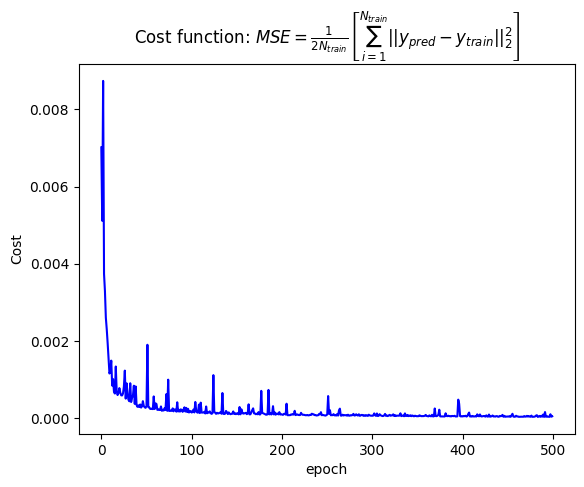

In [7]:
# Epsilon = 0.05:

# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/basil/Downloads/data_05.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

# Error:
error_xc = np.zeros(N_test)
for i in range(N_test):
    error_xc[i] = abs(y_test.iloc[i,0] - y_pred.iloc[i,0])

error_yc = np.zeros(N_test)
for i in range(N_test):
    error_yc[i] = abs(y_test.iloc[i,1] - y_pred.iloc[i,1])
    


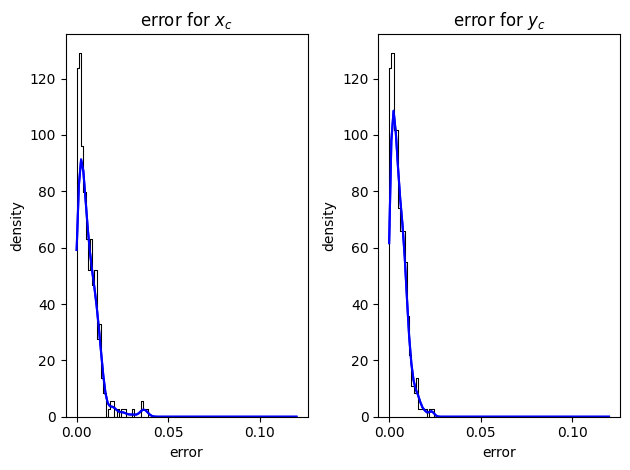

The mean for error for xc is 0.006177083355483213
The mean for error for yc is 0.00523834819581989
The variance for error for xc is 3.6069647718838786e-05
The variance for error for yc is 1.7222896247193928e-05


In [8]:
# Plot of error for x_c and y_c;
import scipy.stats as stats


fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(error_xc)
    n, x, _ = axes[0].hist(error_xc, bins=np.linspace(0,0.12 , 100), 
                   histtype=u'step', density=True,linewidth = 0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_c$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(error_yc)
    n, x, _ = axes[1].hist(error_yc, bins=np.linspace(0,0.12 , 100), 
                   histtype=u'step', density=True,linewidth = 0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_c$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')

plt.tight_layout()
plt.show()

# The mean of the error
print('The mean for error for xc is',error_xc.mean())
print('The mean for error for yc is',error_yc.mean())

# The variance
print('The variance for error for xc is', error_xc.var())
print('The variance for error for yc is', error_yc.var())

Test sample 1: Predicted value = 0.279216052959331, True value = 0.47384
Test sample 2: Predicted value = 0.2839630526672436, True value = 0.29688
Test sample 3: Predicted value = 0.11824089604015602, True value = 0.26296
Test sample 4: Predicted value = 0.45043145419538566, True value = 0.49308
Test sample 5: Predicted value = 0.38550047046219366, True value = 0.36684
Test sample 6: Predicted value = 0.15563232999440374, True value = 0.08638
Test sample 7: Predicted value = 0.1858283500075073, True value = 0.29425
Test sample 8: Predicted value = 0.40388769139154845, True value = 0.41876
Test sample 9: Predicted value = 0.36011681877315976, True value = 0.33861
Test sample 10: Predicted value = 0.3019660968096154, True value = 0.29865
Test sample 11: Predicted value = 0.33294739217807884, True value = 0.34979
Test sample 12: Predicted value = 0.451912842326597, True value = 0.45053
Test sample 13: Predicted value = 0.3073917657709191, True value = 0.28624
Test sample 14: Predicted val

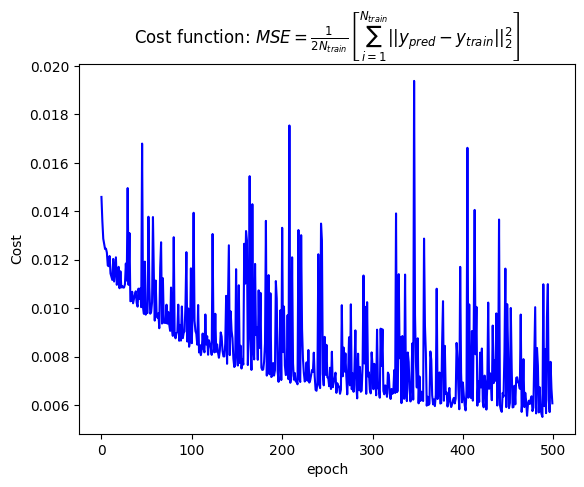

In [3]:
# Epsilon = 0.001:

# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/basil/Downloads/data_001.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

# Error:
error_xc = np.zeros(N_test)
for i in range(N_test):
    error_xc[i] = abs(y_test.iloc[i,0] - y_pred.iloc[i,0])

error_yc = np.zeros(N_test)
for i in range(N_test):
    error_yc[i] = abs(y_test.iloc[i,1] - y_pred.iloc[i,1])
    


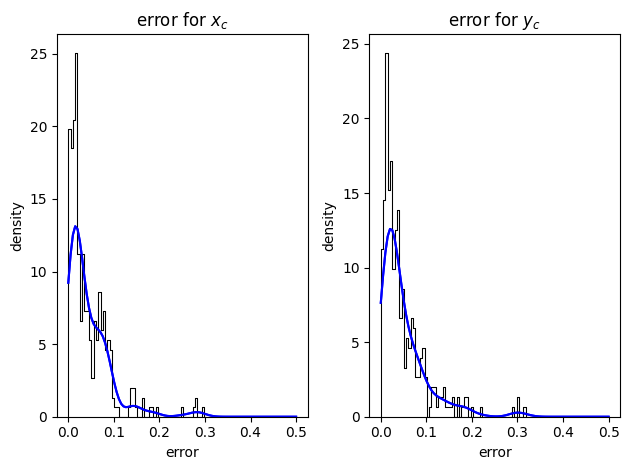

The mean for error for xc is 0.04432332339352547
The mean for error for yc is 0.04939544409985231
The variance for error for xc is 0.0022994784603356253
The variance for error for yc is 0.0026639108925795353


In [4]:
# Plot of error for x_c and y_c;
import scipy.stats as stats


fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(error_xc)
    n, x, _ = axes[0].hist(error_xc, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_c$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(error_yc)
    n, x, _ = axes[1].hist(error_yc, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_c$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')

plt.tight_layout()
plt.show()

# The mean of the error
print('The mean for error for xc is',error_xc.mean())
print('The mean for error for yc is',error_yc.mean())

# The variance
print('The variance for error for xc is', error_xc.var())
print('The variance for error for yc is', error_yc.var())

Test sample 1: Predicted value = 0.15023996522200053, True value = 0.47384
Test sample 2: Predicted value = 0.19476862145082013, True value = 0.29688
Test sample 3: Predicted value = 0.11372938302570121, True value = 0.26296
Test sample 4: Predicted value = 0.4964937814207556, True value = 0.49308
Test sample 5: Predicted value = 0.33710907542079166, True value = 0.36684
Test sample 6: Predicted value = 0.1461068036388693, True value = 0.08638
Test sample 7: Predicted value = 0.13580898713779982, True value = 0.29425
Test sample 8: Predicted value = 0.27817405413253443, True value = 0.41876
Test sample 9: Predicted value = 0.32957243581346396, True value = 0.33861
Test sample 10: Predicted value = 0.33962924622031637, True value = 0.29865
Test sample 11: Predicted value = 0.2144417875963387, True value = 0.34979
Test sample 12: Predicted value = 0.4526235105240062, True value = 0.45053
Test sample 13: Predicted value = 0.21678573099731294, True value = 0.28624
Test sample 14: Predicted

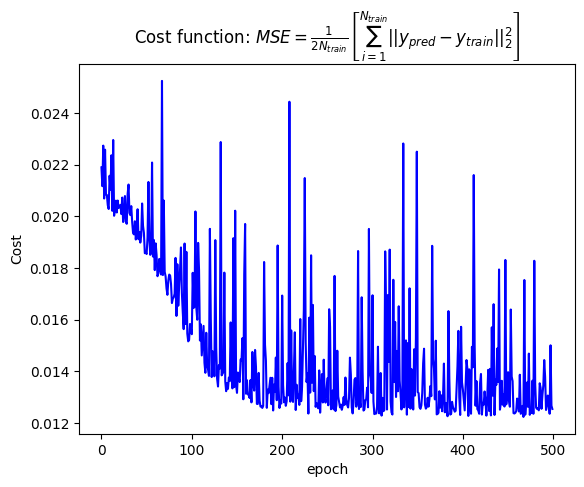

In [5]:
# Epsilon = 0.0001:

# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('C:/Users/basil/Downloads/data_0001.csv')

X = df.iloc[:,0:3]
y = df.iloc[:,3:5]

# Start the timer
start_time = time.time()

# Generate data points
X = df.iloc[:,:3]
y = df.iloc[:,3:5]
# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 3
hidden_size = [64,32,32]
# List of hidden layer sizes
output_size = 2

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

# Error:
error_xc = np.zeros(N_test)
for i in range(N_test):
    error_xc[i] = abs(y_test.iloc[i,0] - y_pred.iloc[i,0])

error_yc = np.zeros(N_test)
for i in range(N_test):
    error_yc[i] = abs(y_test.iloc[i,1] - y_pred.iloc[i,1])
    


In [ ]:
# Plot of error for x_c and y_c;
import scipy.stats as stats


fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(error_xc)
    n, x, _ = axes[0].hist(error_xc,` bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth = 0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_c$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(error_yc)
    n, x, _ = axes[1].hist(error_yc, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth = 0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_c$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')

plt.tight_layout()
plt.show()

# The mean of the error
print('The mean for error for xc is',error_xc.mean())
print('The mean for error for yc is',error_yc.mean())

# The variance
print('The variance for error for xc is', error_xc.var())
print('The variance for error for xc is', error_yc.var())

In [39]:
# Summation of functions:

# 2-D:
import pandas as pd
df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_01.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 5
hidden_size = [32,32,32]
# List of hidden layer sizes
output_size = 4

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j].reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j].reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j].reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train[j].reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test[k].reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c_1','y_c_1','x_c_2','y_c_2'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,2]}, True value = {y_test.iloc[i,2]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,3]}, True value = {y_test.iloc[i,3]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

KeyError: 185

In [45]:
# Build neural network for f1 + f2 epsilon = 0.01:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(42)

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_01.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)


# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred = model.predict(X_test)

# Print all predictions alongside the actual values
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("Predicted:", predictions[i])
    print("Actual:", y_test.iloc[i])
    print()

Epoch 1/100
700/700 [==============================] - 2s 2ms/step - loss: 0.0042
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 5/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 6/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0010
Epoch 7/100
700/700 [==============================] - 1s 2ms/step - loss: 9.2831e-04
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 8.7245e-04
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 8.2338e-04
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 7.7923e-04
Epoch 11/100
700/700 [==============================] - 1s 2ms/step - loss: 7.4040e-04
Epoch 12/100
700/700 [==============================] - 1s 2ms/step - loss: 

Actual: x_c_1    0.787584
y_c_1    0.394948
x_c_2    0.664284
y_c_2    0.497690
Name: 413, dtype: float64

Sample 203:
Predicted: [0.79738164 0.21364304 0.62782604 0.3441454 ]
Actual: x_c_1    0.793530
y_c_1    0.207276
x_c_2    0.637137
y_c_2    0.316294
Name: 237, dtype: float64

Sample 204:
Predicted: [0.7448371  0.3781954  0.65344906 0.4752098 ]
Actual: x_c_1    0.734048
y_c_1    0.367120
x_c_2    0.661731
y_c_2    0.479573
Name: 485, dtype: float64

Sample 205:
Predicted: [0.7046714  0.3266217  0.71656746 0.30860233]
Actual: x_c_1    0.774560
y_c_1    0.312916
x_c_2    0.656671
y_c_2    0.327466
Name: 736, dtype: float64

Sample 206:
Predicted: [0.65668476 0.28174037 0.654324   0.32884142]
Actual: x_c_1    0.646908
y_c_1    0.307285
x_c_2    0.669739
y_c_2    0.312799
Name: 615, dtype: float64

Sample 207:
Predicted: [0.7492223  0.24046198 0.705485   0.36857533]
Actual: x_c_1    0.739861
y_c_1    0.219280
x_c_2    0.729058
y_c_2    0.373347
Name: 4, dtype: float64

Sample 208:
Pre

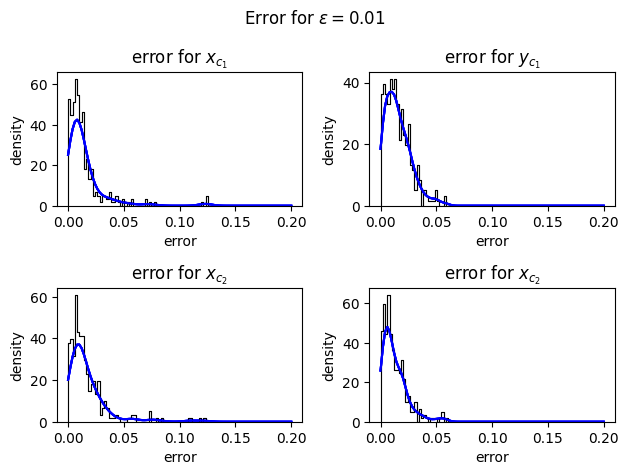

In [46]:
diff_1 = abs(predictions - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_1.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_1.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_1.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_1.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_1.iloc[:,3], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')

# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.01$')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [47]:
# Mean of the error:
print(diff_1.mean())

# Variance of the error:
print(diff_1.var())

x_c_1    0.014322
y_c_1    0.015488
x_c_2    0.016661
y_c_2    0.012664
dtype: float64
x_c_1    0.000319
y_c_1    0.000129
x_c_2    0.000323
y_c_2    0.000121
dtype: float64


In [14]:
# Build neural network for f1 + f2 epsilon = 0.05:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_05.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(301197)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred = model.predict(X_test)

# Print all predictions alongside the actual values
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("Predicted:", predictions[i])
    print("Actual:", y_test.iloc[i])
    print()

Epoch 1/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0043
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0017
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0012
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 9.2574e-04
Epoch 11/100
700/700 [==============================] - 1s 1ms/step - loss: 8.5162e-04
Epoch 12/100
700/700 [==============================] - 1s 1ms/step - loss: 7.7769e-04
E

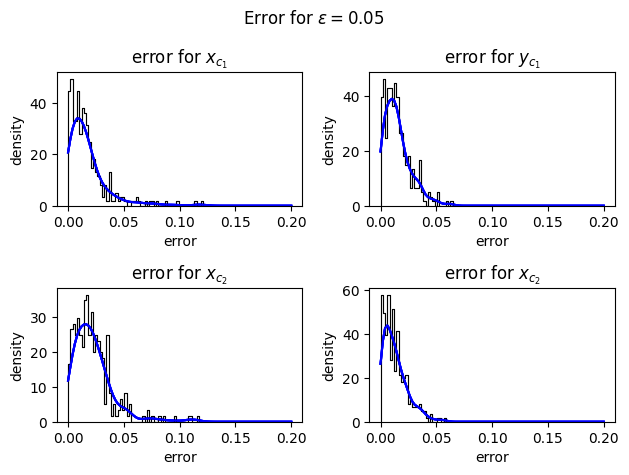

In [15]:
diff_2 = abs(predictions - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_2.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_2.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_2.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_2.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_2.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_2.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_2.iloc[:,3], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')
 
    # Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ ')

    # Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [16]:
# Mean of the error:
print(diff_2.mean())

# Variance of the error:
print(diff_2.var())

x_c_1    0.017013
y_c_1    0.015106
x_c_2    0.022186
y_c_2    0.013013
dtype: float64
x_c_1    0.000310
y_c_1    0.000135
x_c_2    0.000318
y_c_2    0.000117
dtype: float64


In [17]:
# Build neural network for f1 + f2 epsilon = 0.001:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_001.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(301197)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred = model.predict(X_test)

# Print all predictions alongside the actual values
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("Predicted:", predictions[i])
    print("Actual:", y_test.iloc[i])
    print()

Epoch 1/100
700/700 [==============================] - 2s 1ms/step - loss: 0.0042
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0015
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0013
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0011
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 9.5834e-04
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 9.0825e-04
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 8.5636e-04
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 8.2356e-04
Epoch 11/100
700/700 [==============================] - 1s 1ms/step - loss: 7.9209e-04
Epoch 12/100
700/700 [==============================] - 1s 1ms/step - loss: 

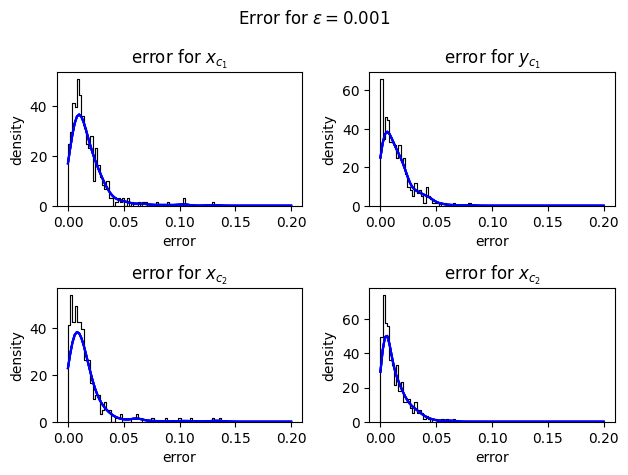

In [18]:
diff_3 = abs(predictions - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_3.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_3.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_3.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_3.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_3.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_3.iloc[:,3], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $x_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')

# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.001$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [19]:
# Mean of the error:
print(diff_3.mean())

# Variance of the error:
print(diff_3.var())

x_c_1    0.017248
y_c_1    0.014597
x_c_2    0.015279
y_c_2    0.012320
dtype: float64
x_c_1    0.000270
y_c_1    0.000167
x_c_2    0.000316
y_c_2    0.000126
dtype: float64


In [28]:
# Build neural network for f1 + f2 epsilon = 0.0001:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import random

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

df = pd.read_csv('C:/Users/basil/Downloads/data_f1f2_0001.csv')

X = df.iloc[:,0:5]
y = df.iloc[:,5:9]

# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(5,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(4))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Set the random seed for TensorFlow backend (Keras)
random.set_seed(301197)
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred = model.predict(X_test)

# Print all predictions alongside the actual values
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("Predicted:", predictions[i])
    print("Actual:", y_test.iloc[i])
    print()

Epoch 1/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 2/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0019
Epoch 3/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 4/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 5/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 6/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 7/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 8/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 9/10
350/350 [==============================] - 1s 2ms/step - loss: 0.0011
Epoch 10/10
10/10 [==============================] - 0s 2ms/step
[[0.6703303  0.23839886 0.9114069  0.3638308 ]
 [0.7344215  0.276833   0.91092384 0.40168476]
 [0.69103336 0.30242705 0.67393196 0.40546256]
 [0.6121922  0.32797438 0.73621964 0.48188835]
 [0.64803433 0.302

Actual: x_c_1    0.760270
y_c_1    0.211387
x_c_2    0.770352
y_c_2    0.478279
Name: 614, dtype: float64

Sample 278:
Predicted: [0.75576687 0.28941137 0.7150133  0.36515892]
Actual: x_c_1    0.780976
y_c_1    0.266333
x_c_2    0.645554
y_c_2    0.365981
Name: 224, dtype: float64

Sample 279:
Predicted: [0.7600111  0.38253164 0.81356406 0.40359825]
Actual: x_c_1    0.731020
y_c_1    0.387880
x_c_2    0.840157
y_c_2    0.402673
Name: 52, dtype: float64

Sample 280:
Predicted: [0.6761904  0.35207573 0.87240815 0.4694352 ]
Actual: x_c_1    0.619704
y_c_1    0.365596
x_c_2    0.843850
y_c_2    0.458208
Name: 947, dtype: float64

Sample 281:
Predicted: [0.7196716  0.23029138 0.6670028  0.3293953 ]
Actual: x_c_1    0.755760
y_c_1    0.272006
x_c_2    0.638856
y_c_2    0.320482
Name: 420, dtype: float64

Sample 282:
Predicted: [0.73318744 0.33146256 0.7107246  0.43800825]
Actual: x_c_1    0.756886
y_c_1    0.345416
x_c_2    0.712218
y_c_2    0.461656
Name: 841, dtype: float64

Sample 283:
Pr

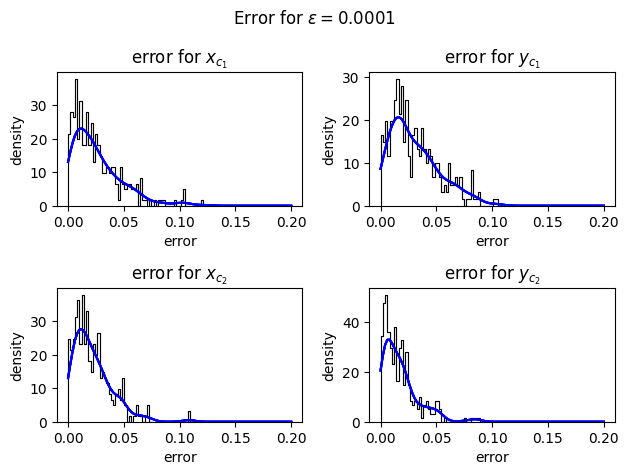

In [29]:
diff_4 = abs(predictions - y_test)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=2)

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_4.iloc[:,0])
    n, x, _ = axes[0,0].hist(diff_4.iloc[:,0], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c_1}$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_4.iloc[:,1])
    n, x, _ = axes[0,1].hist(diff_4.iloc[:,1], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c_1}$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_4.iloc[:,2])
    n, x, _ = axes[1,0].hist(diff_4.iloc[:,2], bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c_2}$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_4.iloc[:,3])
    n, x, _ = axes[1,1].hist(diff_4.iloc[:,3],linewidth=0.75, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $y_{c_2}$')
    axes[1,1].set_xlabel('error')    
    axes[1,1].set_ylabel('density')

# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.0001$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [30]:
# Mean of the error:
print(diff_4.mean())

# Variance of the error:
print(diff_4.var())

x_c_1    0.025759
y_c_1    0.030513
x_c_2    0.021959
y_c_2    0.017549
dtype: float64
x_c_1    0.000474
y_c_1    0.000477
x_c_2    0.000295
y_c_2    0.000254
dtype: float64


In [18]:
# Data in 3 Dimensions
import pandas as pd

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

U, S, VT = np.linalg.svd(X_train, full_matrices=False) # full_matrices=False - discussed later
print("     U's  shape: ", U.shape)
print("     VT's shape: ", VT.shape)
print("      S's shape: ", S.shape)
print("diag(S)'s shape: ", np.diag(S).shape)

     U's  shape:  (700, 99)
     VT's shape:  (99, 99)
      S's shape:  (99,)
diag(S)'s shape:  (99, 99)


In [ ]:
# Data in 3 Dimensions
import pandas as pd

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

U, S, VT = np.linalg.svd(X_train, full_matrices=False) # full_matrices=False - discussed later
print("     U's  shape: ", U.shape)
print("     VT's shape: ", VT.shape)
print("      S's shape: ", S.shape)
print("diag(S)'s shape: ", np.diag(S).shape)

# Define the model
nc = 10
Xc = U[:, :nc] @ np.diag(S[:nc]) @ VT[:nc, :]

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(Xc.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(3))  # Output layer with 2 neurons for 2D output

# Compile the model
model.compile(optimizer= SGD(0.1), loss='mean_squared_error')

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(Xc) 
# now carry out the transformation of all of the feauture data  
Xc = scaler.transform(Xc)
X_test = scaler.transform(X_test)

Xc = pd.DataFrame(Xc)
X_test = pd.DataFrame(X_test)

# Train the model
model.fit(Xc, y_train, epochs=100, batch_size=1)

# Make predictions
predictions = model.predict(X_test)

# Print the first few predictions
print(predictions[:5])

# Use the trained model for prediction on the test set
y_pred = model.predict(X_test)

# Print all predictions alongside the actual values
for i in range(len(X_test)):
    print(f"Sample {i+1}:")
    print("Predicted:", predictions[i])
    print("Actual:", y_test.iloc[i])
    print()
diff3d_10 = abs(predictions - y_test)

Test sample 1: Predicted value = 0.8583516673795853, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5580545688644304, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5489191582195119, True value = 0.52073145970559
Test sample 4: Predicted value = 0.7994286738269183, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6770557516275519, True value = 0.686946558999973
Test sample 6: Predicted value = 0.2361173092014464, True value = 0.238208247061194
Test sample 7: Predicted value = 0.6220398905991301, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7843674829436357, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6190666878170102, True value = 0.641783571475397
Test sample 10: Predicted value = 0.5523629046963837, True value = 0.577834316643059
Test sample 11: Predicted value = 0.6615737936202709, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8719426390573342, True value = 0.820854

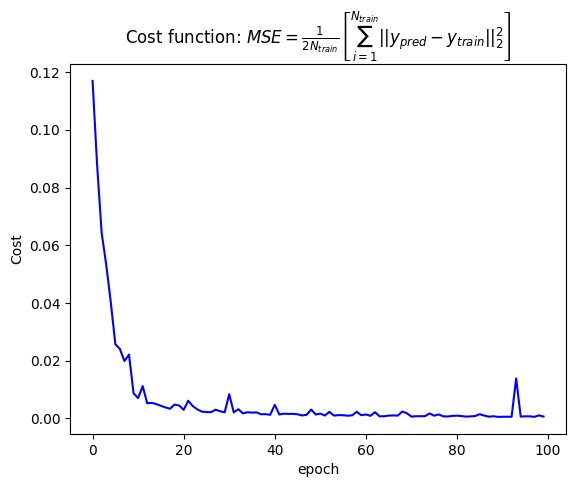

In [4]:
# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

U, S, VT = np.linalg.svd(X_train, full_matrices=False) # full_matrices=False - discussed later

# Define the model
nc = 10
X_train = X_train @ VT[:nc,:].T
X_test  = X_test  @ VT[:nc,:].T

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
Xc = X_train 
X_test  = pd.DataFrame(X_test)
N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 100

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = nc
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = Xc.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = Xc.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

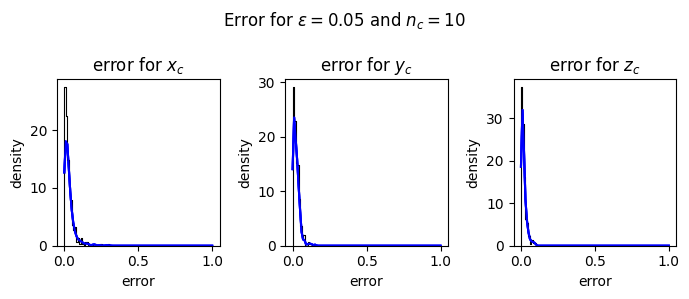

In [5]:
import numpy as np

y_pred_array = y_pred.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1)
    n, x, _ = axes[0].hist(diff_1, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2)
    n, x, _ = axes[1].hist(diff_2, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3)
    n, x, _ = axes[2].hist(diff_3, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ and $n_c = 10$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

Test sample 1: Predicted value = 0.8807766558079865, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5195009075749193, True value = 0.575002039578945
Test sample 3: Predicted value = 0.4534990126965132, True value = 0.52073145970559
Test sample 4: Predicted value = 0.850602184561367, True value = 0.888929186843236
Test sample 5: Predicted value = 0.696918709484216, True value = 0.686946558999973
Test sample 6: Predicted value = 0.20872344407376642, True value = 0.238208247061194
Test sample 7: Predicted value = 0.5471180866289459, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7824637497857893, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6672231496740114, True value = 0.641783571475397
Test sample 10: Predicted value = 0.5982925048569738, True value = 0.577834316643059
Test sample 11: Predicted value = 0.7283530394267749, True value = 0.659659889572103
Test sample 12: Predicted value = 0.7982224243569545, True value = 0.8208542

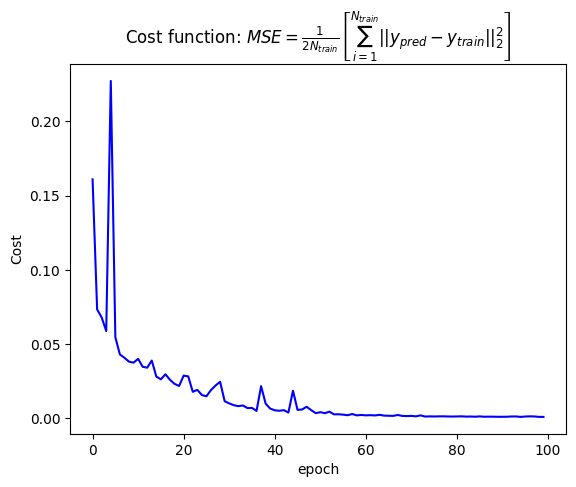

In [6]:
# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

U, S, VT = np.linalg.svd(X_train, full_matrices=False) # full_matrices=False - discussed later

# Define the model
nc = 30
X_train = X_train @ VT[:nc, :].T
X_test  = X_test  @ VT[:nc,:].T

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
# initialise the scaler by feeding it the training data 
scaler.fit(X_train) 
# now carry out the transformation of all of the feauture data  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Xc = pd.DataFrame(X_train)
X_test  = pd.DataFrame(X_test)
N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 100

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = nc
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = Xc.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = Xc.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

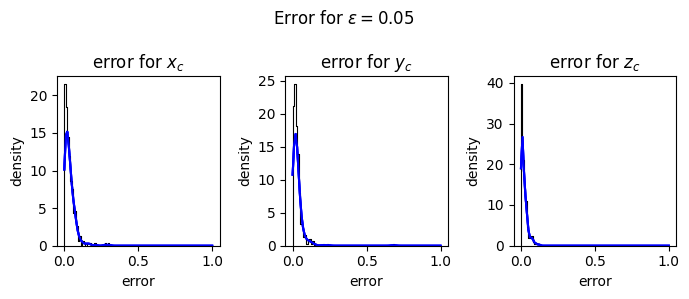

In [7]:
import numpy as np

y_pred_array = y_pred.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_3 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_3 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_3 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_3)
    n, x, _ = axes[0].hist(diff_1_3, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_3)
    n, x, _ = axes[1].hist(diff_2_3, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_3)
    n, x, _ = axes[2].hist(diff_3_3, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [17]:
print('For nc = 10 singular values the mean =\n', diff3d_10.mean())
print('For nc = 30 singular values the mean =\n', diff3d_30.mean())
print('For the original matrix the mean =\n', diff3d_99.mean())

For nc = 10 singular values the mean =
 x_c    0.020725
y_c    0.015936
z_c    0.014272
dtype: float64
For nc = 30 singular values the mean =
 x_c    0.020386
y_c    0.014994
z_c    0.013416
dtype: float64
For the original matrix the mean =
 x_c    0.019111
y_c    0.017183
z_c    0.015507
dtype: float64


Test sample 1: Predicted value = 0.865348342709409, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5909910578829515, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5209121553190741, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8221604894517831, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6968802572631712, True value = 0.686946558999973
Test sample 6: Predicted value = 0.20522837611774272, True value = 0.238208247061194
Test sample 7: Predicted value = 0.6039702227259981, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7501286279384878, True value = 0.770014093496705
Test sample 9: Predicted value = 0.726845764485459, True value = 0.641783571475397
Test sample 10: Predicted value = 0.6252184982515476, True value = 0.577834316643059
Test sample 11: Predicted value = 0.6786795338608499, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8603209751690808, True value = 0.8208542

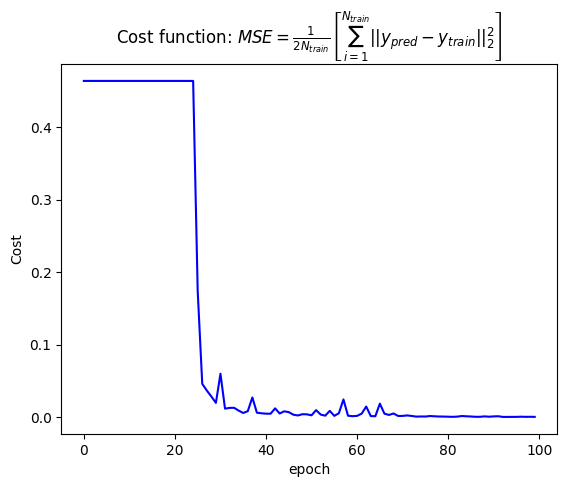

In [8]:
# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D = pd.read_csv('C:/Users/basil/Downloads/data_3d.csv')

X = D.iloc[:,0:99]
y = D.iloc[:,99:102]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 100

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 99
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred = pd.DataFrame(y_pred.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# Plot the Cost function:
plt.plot(range(epochs),J,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{2N_{train}}\left[ \sum_{i=1}^{N_{train}}\left|\left|y_{pred} - y_{train}\right|\right|_2^2 \right]$")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

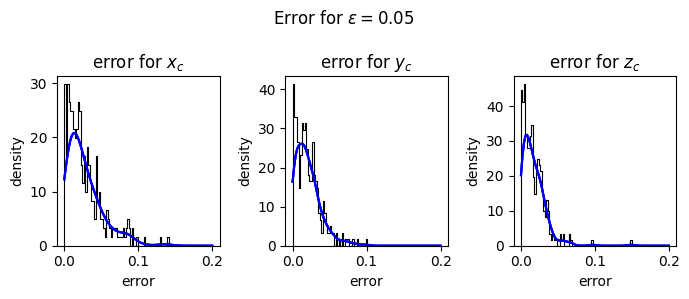

In [9]:
import numpy as np

y_pred_array = y_pred.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_99 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_99 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_99 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_99)
    n, x, _ = axes[0].hist(diff_1_99, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_99)
    n, x, _ = axes[1].hist(diff_2_99, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_99)
    n, x, _ = axes[2].hist(diff_3_99, bins=np.linspace(0,0.2 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

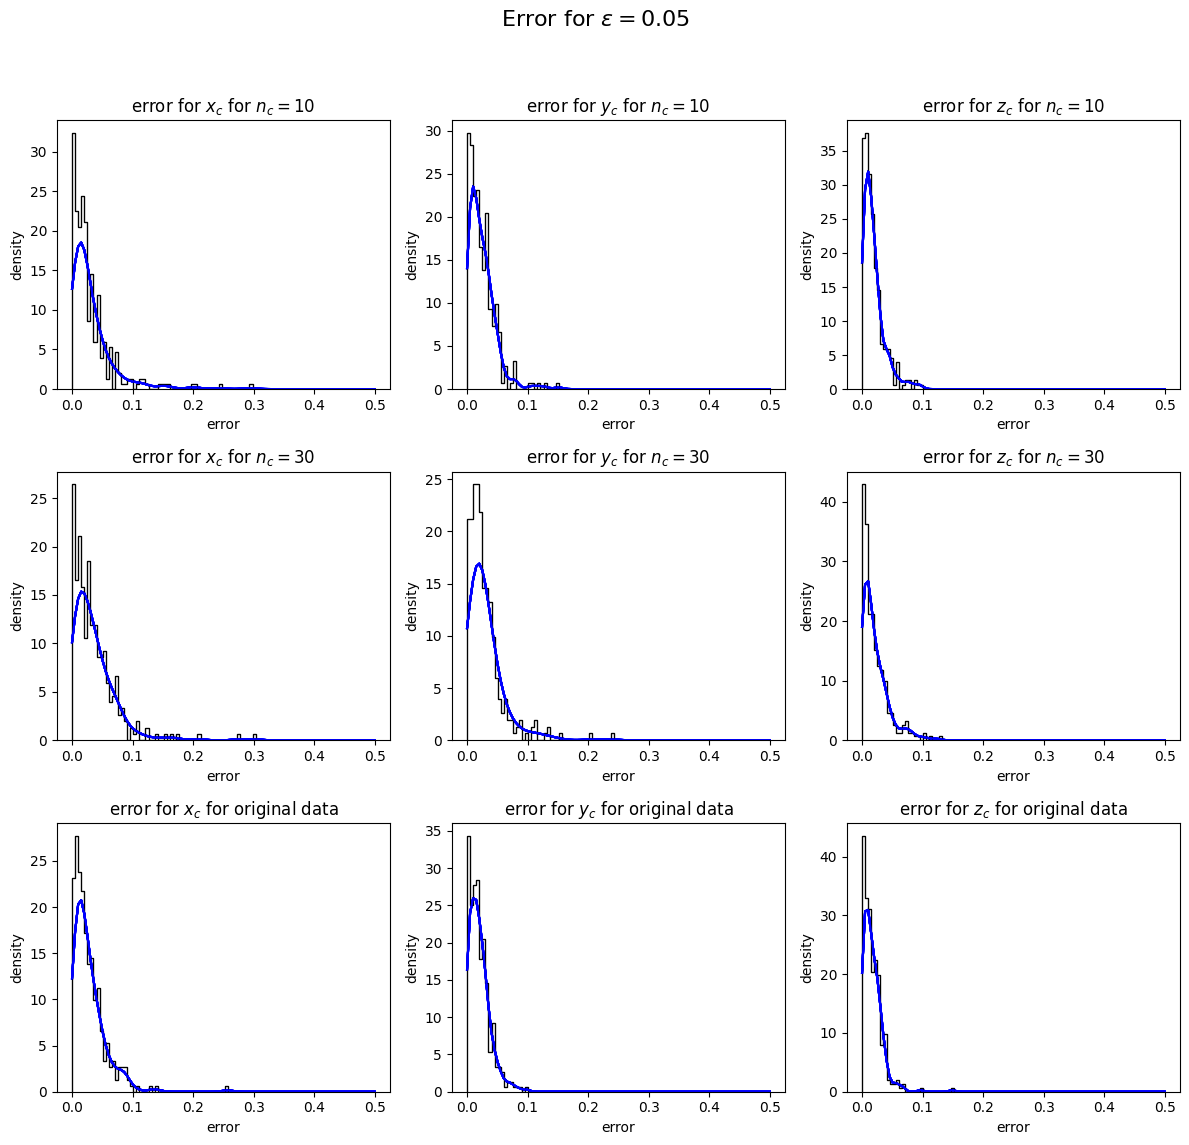

Reconstruction Error: 1.8032
Reconstruction Error: 0.0014


In [10]:
# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (12,12))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1)
    n, x, _ = axes[0,0].hist(diff_1, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,0].plot(x, density(x),color='blue')
    axes[0,0].set_title('error for $x_{c}$ for $n_c=10$')
    axes[0,0].set_xlabel('error')
    axes[0,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2)
    n, x, _ = axes[0,1].hist(diff_2, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,1].plot(x, density(x),color='blue')
    axes[0,1].set_title('error for $y_{c}$ for $n_c=10$')
    axes[0,1].set_xlabel('error')
    axes[0,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3)
    n, x, _ = axes[0,2].hist(diff_3, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0,2].plot(x, density(x),color='blue')
    axes[0,2].set_title('error for $z_{c}$ for $n_c=10$')
    axes[0,2].set_xlabel('error')
    axes[0,2].set_ylabel('density')
    
    
    density = stats.gaussian_kde(diff_1_3)
    n, x, _ = axes[1,0].hist(diff_1_3, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,0].plot(x, density(x),color='blue')
    axes[1,0].set_title('error for $x_{c}$ for $n_c=30$')
    axes[1,0].set_xlabel('error')
    axes[1,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_3)
    n, x, _ = axes[1,1].hist(diff_2_3, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,1].plot(x, density(x),color='blue')
    axes[1,1].set_title('error for $y_{c}$ for $n_c=30$')
    axes[1,1].set_xlabel('error')
    axes[1,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_3)
    n, x, _ = axes[1,2].hist(diff_3_3, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1,2].plot(x, density(x),color='blue')
    axes[1,2].set_title('error for $z_{c}$ for $n_c=30$')
    axes[1,2].set_xlabel('error')
    axes[1,2].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_1_99)
    n, x, _ = axes[2,0].hist(diff_1_99, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[2,0].plot(x, density(x),color='blue')
    axes[2,0].set_title('error for $x_{c}$ for original data')
    axes[2,0].set_xlabel('error')
    axes[2,0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_99)
    n, x, _ = axes[2,1].hist(diff_2_99, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[2,1].plot(x, density(x),color='blue')
    axes[2,1].set_title('error for $y_{c}$ for original data')
    axes[2,1].set_xlabel('error')
    axes[2,1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_99)
    n, x, _ = axes[2,2].hist(diff_3_99, bins=np.linspace(0,0.5 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2,2].plot(x, density(x),color='blue')
    axes[2,2].set_title('error for $z_{c}$ for original data')
    axes[2,2].set_xlabel('error')
    axes[2,2].set_ylabel('density')
    
# Set a general title for the entire figure
    
# Adjust the layout and spacing between subplots
fig.suptitle(r'Error for $\varepsilon = 0.05$',fontsize=16)
# Adjust the layout and spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect parameter as needed
plt.show()

nc = np.array([10,30])
for i in range(nc.shape[0]):
    
# Reconstruct the data matrix using the selected number of components
    Xc = U[:, :nc[i]] @ np.diag(S[:nc[i]]) @ VT[:nc[i], :]

# Calculate and print the reconstruction error
    reconstruction_error = np.linalg.norm(X_train - Xc)
    print("Reconstruction Error:", format(reconstruction_error,".4f"))

In [11]:
print('The mean of the xc for nc = 10 is',format(diff_1.min(),".5f"))
print('The mean of the yc for nc = 10 is',format(diff_2.min(),".5f"))
print('The mean of the zc for nc = 10 is',format(diff_3.min(),".5f"))

print('The mean of the xc for nc = 30 is',format(diff_1_3.min(),".5f"))
print('The mean of the yc for nc = 30 is',format(diff_2_3.min(),".5f"))
print('The mean of the zc for nc = 30 is',format(diff_3_3.min(),".5f"))

print('The mean of the xc is', format(diff_1_99.min(),".5f"))
print('The mean of the yc is', format(diff_2_99.min(),".5f"))
print('The mean of the zc is', format(diff_3_99.min(),".5f"))

The mean of the xc for nc = 10 is 0.00016
The mean of the yc for nc = 10 is 0.00021
The mean of the zc for nc = 10 is 0.00001
The mean of the xc for nc = 30 is 0.00002
The mean of the yc for nc = 30 is 0.00006
The mean of the zc for nc = 30 is 0.00023
The mean of the xc is 0.00018
The mean of the yc is 0.00011
The mean of the zc is 0.00018


In [12]:
print('The mean of the xc for nc = 10 is',format(diff_1.max(),".4f"))
print('The mean of the yc for nc = 10 is',format(diff_2.max(),".4f"))
print('The mean of the zc for nc = 10 is',format(diff_3.max(),".4f"))

print('The mean of the xc for nc = 30 is',format(diff_1_3.max(),".4f"))
print('The mean of the yc for nc = 30 is',format(diff_2_3.max(),".4f"))
print('The mean of the zc for nc = 30 is',format(diff_3_3.max(),".4f"))

print('The mean of the xc is', format(diff_1_99.max(),".4f"))
print('The mean of the yc is', format(diff_2_99.max(),".4f"))
print('The mean of the zc is', format(diff_3_99.max(),".4f"))

The mean of the xc for nc = 10 is 0.2935
The mean of the yc for nc = 10 is 0.1511
The mean of the zc for nc = 10 is 0.0965
The mean of the xc for nc = 30 is 0.3028
The mean of the yc for nc = 30 is 0.6827
The mean of the zc for nc = 30 is 0.1267
The mean of the xc is 0.2569
The mean of the yc is 0.0990
The mean of the zc is 0.1490


In [13]:
print('The mean of the xc for nc = 10 is',format(diff_1.mean(),".4f"))
print('The mean of the yc for nc = 10 is',format(diff_2.mean(),".4f"))
print('The mean of the zc for nc = 10 is',format(diff_3.mean(),".4f"))

print('The mean of the xc for nc = 30 is',format(diff_1_3.mean(),".4f"))
print('The mean of the yc for nc = 30 is',format(diff_2_3.mean(),".4f"))
print('The mean of the zc for nc = 30 is',format(diff_3_3.mean(),".4f"))

print('The mean of the xc is', format(diff_1_99.mean(),".4f"))
print('The mean of the yc is', format(diff_2_99.mean(),".4f"))
print('The mean of the zc is', format(diff_3_99.mean(),".4f"))

The mean of the xc for nc = 10 is 0.0307
The mean of the yc for nc = 10 is 0.0243
The mean of the zc for nc = 10 is 0.0185
The mean of the xc for nc = 30 is 0.0361
The mean of the yc for nc = 30 is 0.0318
The mean of the zc for nc = 30 is 0.0214
The mean of the xc is 0.0282
The mean of the yc is 0.0206
The mean of the zc is 0.0172


In [14]:

print('The variance of the xc for nc = 10 is',format(diff_1.var(),".4f"))
print('The variance of the yc for nc = 10 is',format(diff_2.var(),".4f"))
print('The variance of the zc for nc = 10 is',format(diff_3.var(),".4f"))

print('The variance of the xc for nc = 30 is',format(diff_1_3.var(),".4f"))
print('The variance of the yc for nc = 30 is',format(diff_2_3.var(),".4f"))
print('The variance of the zc for nc = 30 is',format(diff_3_3.var(),".4f"))

print('The variance of the xc is', format(diff_1_99.var(),".4f"))
print('The variance of the yc is', format(diff_2_99.var(),".4f"))
print('The variance of the zc is', format(diff_3_99.var(),".4f"))

The variance of the xc for nc = 10 is 0.0014
The variance of the yc for nc = 10 is 0.0005
The variance of the zc for nc = 10 is 0.0003
The variance of the xc for nc = 30 is 0.0014
The variance of the yc for nc = 30 is 0.0023
The variance of the zc for nc = 30 is 0.0005
The variance of the xc is 0.0007
The variance of the yc is 0.0003
The variance of the zc is 0.0003


In [21]:
# Using 9 sensors:

# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D9 = pd.read_csv('C:/Users/basil/Downloads/data3d_9.csv')

X = D9.iloc[:,0:9]
y = D9.iloc[:,9:12]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 300

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 9
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_1 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_1 = pd.DataFrame(y_pred_1.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.8393953647566833, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5909211001641249, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5115888996183512, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8143556535952273, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6941348123093181, True value = 0.686946558999973
Test sample 6: Predicted value = 0.19072094143678497, True value = 0.238208247061194
Test sample 7: Predicted value = 0.5259000953279223, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7785214817953461, True value = 0.770014093496705
Test sample 9: Predicted value = 0.5981930215024372, True value = 0.641783571475397
Test sample 10: Predicted value = 0.5888925021961022, True value = 0.577834316643059
Test sample 11: Predicted value = 0.6563143909085797, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8766228741898894, True value = 0.82085

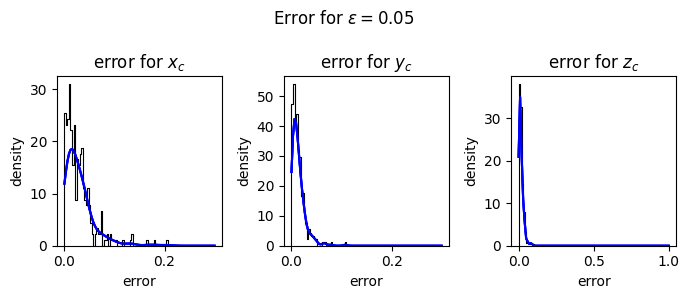

In [22]:
import numpy as np

y_pred_array = y_pred_1.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_1 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_1.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_1 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_1.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_1 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_1)
    n, x, _ = axes[0].hist(diff_1_1, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_1)
    n, x, _ = axes[1].hist(diff_2_1, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_1)
    n, x, _ = axes[2].hist(diff_3_1, bins=np.linspace(0,1 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.05$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [23]:
print('The mean of the xc',format(diff_1_1.min(),".5f"))
print('The mean of the yc',format(diff_2_1.min(),".5f"))
print('The mean of the zc',format(diff_3_1.min(),".5f"))

print('The mean of the xc',format(diff_1_1.max(),".5f"))
print('The mean of the yc',format(diff_2_1.max(),".5f"))
print('The mean of the zc',format(diff_3_1.max(),".5f"))

print('The mean of the xc',format(diff_1_1.mean(),".5f"))
print('The mean of the yc',format(diff_2_1.mean(),".5f"))
print('The mean of the zc',format(diff_3_1.mean(),".5f"))

print('The variance of the xc',format(diff_1_1.var(),".5f"))
print('The variance of the yc',format(diff_2_1.var(),".5f"))
print('The variance of the zc',format(diff_3_1.var(),".5f"))

The mean of the xc 0.00037
The mean of the yc 0.00005
The mean of the zc 0.00006
The mean of the xc 0.34457
The mean of the yc 0.10722
The mean of the zc 0.09253
The mean of the xc 0.03036
The mean of the yc 0.01386
The mean of the zc 0.01632
The variance of the xc 0.00117
The variance of the yc 0.00018
The variance of the zc 0.00021


In [ ]:
# Epsilon = 0.1

In [14]:
# Using 9 sensors:

# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D9 = pd.read_csv('C:/Users/basil/Downloads/data3d_9_1.csv')

X = D9.iloc[:,0:9]
y = D9.iloc[:,9:12]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 300

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 9
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_2 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_2[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_2 = pd.DataFrame(y_pred_2.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_2.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_2.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_2.iloc[i,2]}, True value = {y_test.iloc[i,2]}")

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.8561387900941487, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5689355981676867, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5092261880885369, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8524030942458342, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6939446030026264, True value = 0.686946558999973
Test sample 6: Predicted value = 0.2445629415001132, True value = 0.238208247061194
Test sample 7: Predicted value = 0.5723127183675081, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7657486623046277, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6318770013081102, True value = 0.641783571475397
Test sample 10: Predicted value = 0.6063403494852136, True value = 0.577834316643059
Test sample 11: Predicted value = 0.644123807866765, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8413123462323147, True value = 0.8208542

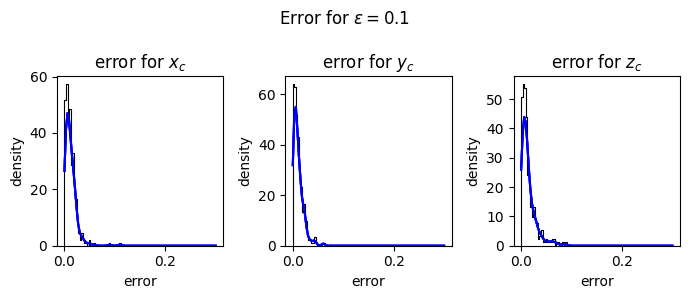

In [24]:
import numpy as np

y_pred_array = y_pred_2.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_2 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_2.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_2 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_2.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_2 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_2)
    n, x, _ = axes[0].hist(diff_1_2, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_2)
    n, x, _ = axes[1].hist(diff_2_2, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_2)
    n, x, _ = axes[2].hist(diff_3_2, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.1$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [28]:
print('The mean of the xc',format(diff_1_2.min(),".7f"))
print('The mean of the yc',format(diff_2_2.min(),".5f"))
print('The mean of the zc',format(diff_3_2.min(),".5f"))

print('The mean of the xc',format(diff_1_2.max(),".5f"))
print('The mean of the yc',format(diff_2_2.max(),".5f"))
print('The mean of the zc',format(diff_3_2.max(),".5f"))

print('The mean of the xc',format(diff_1_2.mean(),".5f"))
print('The mean of the yc',format(diff_2_2.mean(),".5f"))
print('The mean of the zc',format(diff_3_2.mean(),".5f"))

print('The variance of the xc',format(diff_1_2.var(),".5f"))
print('The variance of the yc',format(diff_2_2.var(),".5f"))
print('The variance of the zc',format(diff_3_2.var(),".5f"))

The mean of the xc 0.0000005
The mean of the yc 0.00002
The mean of the zc 0.00017
The mean of the xc 0.11027
The mean of the yc 0.06086
The mean of the zc 0.08819
The mean of the xc 0.01217
The mean of the yc 0.01077
The mean of the zc 0.01411
The variance of the xc 0.00014
The variance of the yc 0.00009
The variance of the zc 0.00021


In [ ]:
# epsilon = 0.5

In [17]:
# Using 9 sensors:

# Summation of functions:

# 3-D:
import pandas as pd
# More hidden layers:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

D9 = pd.read_csv('C:/Users/basil/Downloads/data3d_9_5.csv')

X = D9.iloc[:,0:9]
y = D9.iloc[:,9:12]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 300

# Activation function choices:
function = [leaky_relu, leaky_relu, leaky_relu,leaky_relu, leaky_relu, leaky_relu, tanh]
drv_function = [leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,
                leaky_relu_derivative, leaky_relu_derivative, leaky_relu_derivative,tanh_derivative]
    
# Define the neural network architecture
input_size = 9
hidden_size = [64,32,32,32,32,100]
# List of hidden layer sizes
output_size = 3

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J = np.zeros(epochs) # cost function
    
# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))
    
# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train.iloc[j].values.reshape(-1,1)
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = (weights[k] @ a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = (weights[-1] @ a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train.iloc[j].values.reshape(-1,1)) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train.iloc[j].values.reshape(-1,1)
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        diff  = y_train.iloc[j].values.reshape(-1,1) - a
        J[ep] += denom*((np.linalg.norm(diff,2)**2).sum())

y_pred_3 = np.zeros((N_test, output_size,1))

for k in range(N_test):
    # Forward propagation
    a = X_test.iloc[k].values.reshape(-1, 1)
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_3[k] = function[-1](z) # output

# Convert y_pred from NumPy array to pandas DataFrame
y_pred_3 = pd.DataFrame(y_pred_3.reshape(N_test, output_size),columns = ['x_c','y_c','z_c'])

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_3.iloc[i,0]}, True value = {y_test.iloc[i,0]}")

for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_3.iloc[i,1]}, True value = {y_test.iloc[i,1]}")
    
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_3.iloc[i,2]}, True value = {y_test.iloc[i,2]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.862117963143435, True value = 0.858141088749273
Test sample 2: Predicted value = 0.5795752457975802, True value = 0.575002039578945
Test sample 3: Predicted value = 0.5159935285053072, True value = 0.52073145970559
Test sample 4: Predicted value = 0.8945653153244292, True value = 0.888929186843236
Test sample 5: Predicted value = 0.6852233596908796, True value = 0.686946558999973
Test sample 6: Predicted value = 0.2195206839744882, True value = 0.238208247061194
Test sample 7: Predicted value = 0.5534165089779466, True value = 0.570792671980758
Test sample 8: Predicted value = 0.7707661876756046, True value = 0.770014093496705
Test sample 9: Predicted value = 0.6412894413651046, True value = 0.641783571475397
Test sample 10: Predicted value = 0.5653789112353569, True value = 0.577834316643059
Test sample 11: Predicted value = 0.661959249116608, True value = 0.659659889572103
Test sample 12: Predicted value = 0.8464765324736138, True value = 0.82085424

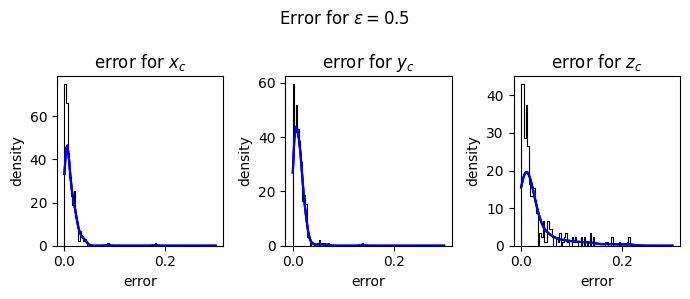

In [25]:
import numpy as np

y_pred_array = y_pred_3.iloc[:,0].to_numpy()
y_test_array = y_test.iloc[:,0].to_numpy()

diff_1_3 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_3.iloc[:,1].to_numpy()
y_test_array = y_test.iloc[:,1].to_numpy()

diff_2_3 = abs(y_pred_array - y_test_array)

y_pred_array = y_pred_3.iloc[:,2].to_numpy()
y_test_array = y_test.iloc[:,2].to_numpy()

diff_3_3 = abs(y_pred_array - y_test_array)

# Plot of error for x_c and y_c;
import scipy.stats as stats

fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (7,3))

for ax in enumerate(axes.flatten()):
        
    density = stats.gaussian_kde(diff_1_3)
    n, x, _ = axes[0].hist(diff_1_3, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[0].plot(x, density(x),color='blue')
    axes[0].set_title('error for $x_{c}$')
    axes[0].set_xlabel('error')
    axes[0].set_ylabel('density')

    density = stats.gaussian_kde(diff_2_3)
    n, x, _ = axes[1].hist(diff_2_3, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True,linewidth=0.75,color='black')  
    axes[1].plot(x, density(x),color='blue')
    axes[1].set_title('error for $y_{c}$')
    axes[1].set_xlabel('error')
    axes[1].set_ylabel('density')
    
    density = stats.gaussian_kde(diff_3_3)
    n, x, _ = axes[2].hist(diff_3_3, bins=np.linspace(0,0.3 , 100), 
                   histtype=u'step', density=True, linewidth=0.75, color='black')  
    axes[2].plot(x, density(x),color='blue')
    axes[2].set_title('error for $z_{c}$')
    axes[2].set_xlabel('error')
    axes[2].set_ylabel('density')
    
# Set a general title for the entire figure
fig.suptitle(r'Error for $\varepsilon = 0.5$ ')

# Adjust the layout and spacing between subplots
plt.tight_layout()
plt.show()

In [20]:
print('The mean of the xc',format(diff_1_3.min(),".5f"))
print('The mean of the yc',format(diff_2_3.min(),".5f"))
print('The mean of the zc',format(diff_3_3.min(),".5f"))

print('The mean of the xc',format(diff_1_3.max(),".5f"))
print('The mean of the yc',format(diff_2_3.max(),".5f"))
print('The mean of the zc',format(diff_3_3.max(),".5f"))

print('The mean of the xc',format(diff_1_3.mean(),".5f"))
print('The mean of the yc',format(diff_2_3.mean(),".5f"))
print('The mean of the zc',format(diff_3_3.mean(),".5f"))

print('The variance of the xc',format(diff_1_3.var(),".5f"))
print('The variance of the yc',format(diff_2_3.var(),".5f"))
print('The variance of the zc',format(diff_3_3.var(),".5f"))

The mean of the xc 0.00001
The mean of the yc 0.00001
The mean of the zc 0.00003
The mean of the xc 0.17931
The mean of the yc 0.13782
The mean of the zc 0.21378
The mean of the xc 0.01145
The mean of the yc 0.01214
The mean of the zc 0.02942
The variance of the xc 0.00020
The variance of the yc 0.00015
The variance of the zc 0.00165
